### t-SNE 聚类模型生成的ModelNet40测试集特征

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt

import torch

In [2]:
state_dict = torch.load('MN_test_feats_labels.pth', map_location=torch.device('cpu'))
state_dict.keys()

dict_keys(['feats_test', 'labels_test'])

In [3]:
print(state_dict['feats_test'].shape)
print(state_dict['feats_test'][0].shape)
print(state_dict['labels_test'].shape)
print(state_dict['labels_test'][0].shape)

(2468, 384)
(384,)
(2468,)
()


In [8]:
# 生成t-SNE嵌入特征，feats_test_embedded.shape: (1024, 2)，第一维代表样本数，第二位代表tsne嵌入空间维度
feats_test_embedded = TSNE(n_components=2, learning_rate='auto', init='random').fit_transform(state_dict['feats_test'])

df = pd.DataFrame()
# y是样本类别，每个样本都有个类别，所以维度是1024
df["label"] = state_dict['labels_test']
df["axis-0"] = feats_test_embedded[:,0]
df["axis-1"] = feats_test_embedded[:,1]

[Text(0.5, 1.0, 'Pretrained CrossFormer Features: T-SNE projection')]

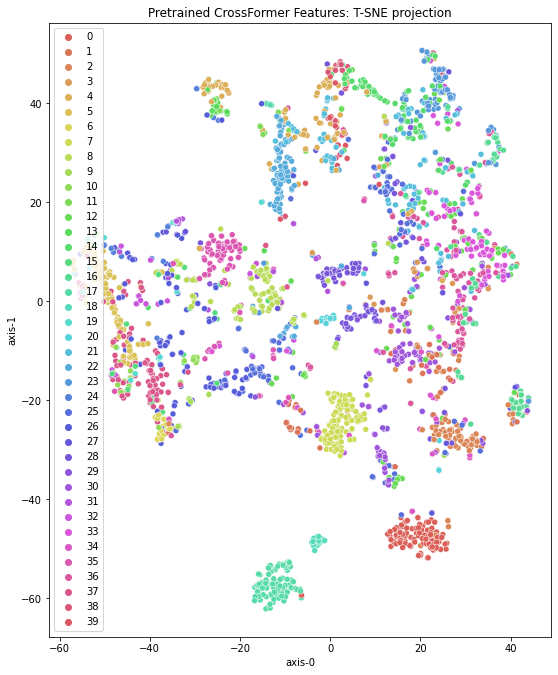

In [12]:
# 控制图片大小
figsize = (9, 11.3)
fig, ax = plt.subplots(figsize=figsize)
sns.scatterplot(ax=ax, x="axis-0", y="axis-1", hue=df.label.tolist(),
                palette=sns.color_palette("hls", 40),
                data=df).set(title="Pretrained CrossFormer Features: T-SNE projection")